<h1>Обработка результатов эксперимента. Метод наименьших квадратов</h1>
Данная глава посвящена решению часто встречающихся на практике задач по
обработке реальных количественных
экспериментальных данных, полученных в результате всевозможных научных
опытов, технических испытаний методом наименьших
квадратов. В первых четырёх параграфах читатель познакомится с
математическими основами метода наименьших квадратов.
Последний пятый параграф посвящён решению задач обработки
экспериментальных данных методом наименьших квадратов с
использованием пакета <b>Octave</b>.

<h3>Постановка задачи</h3>
Метод наименьших квадратов (МНК)
позволяет по экспериментальным данным подобрать такую
аналитическую функцию, которая проходит настолько близко к
экспериментальным точкам, насколько это возможно.

В общем случае задачу можно сформулировать следующим образом.
Пусть в результате эксперимента была получена некая экспериментальная
зависимость $y(x)$, представленная в таблице.

|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|x| $x_1$ | $x_2$ | $x_3$ | $...$ | $x_n-1$ | $x_n$ |
|y| $y_1$ | $y_2$ | $y_3$ | $...$ | $y_n-1$ | $y_n$ |

Необходимо построить аналитическую зависимость $f(x,a_{1},a_{2},\dots, a_{k})$, наиболее точно описывающую результаты
эксперимента. Для построения параметров функции $f(x,a_{1},a_{2},\dots, a_{k})$ будем использовать
<i>метод наименьших квадратов</i>. Идея метода наименьших квадратов заключается в том, что функцию
$f(x,a_{1},a_{2},\dots, a_{k})$ необходимо подобрать таким образом, чтобы сумма квадратов отклонений измеренных
значений $y_i$ от расчётных $Y_{i}=f(x_{i},a_{1},a_{2},\dots, a_{k})$ была бы
наименьшей :
$$
\begin{split}
&S(a_{1},a_{2},\dots,a_{k})=\sum _{i=1}^{n}\left(y_{i}-Y_{i}\right)^{2}=\\
&=\sum_{i=1}^{n}\left(y_{i}-f(x_{i},a_{1},a_{2},\dots,a_{k})\right)^{2}\to \min
\end{split}
$$
Задача состоит из двух этапов:
<ol>
   <li>По результатам эксперимента определить внешний вид подбираемой зависимости.</li>
   <li>Подобрать коэффициенты зависимости $Y=f(x,a_{1},a_{2},\dots,a_{k})$.</li>
</ol>
Математически задача подбора коэффициентов зависимости сводится к определению
коэффициентов $a_{i}$. В <b>Octave</b> её можно
решать несколькими способами:
<ol>
   <li>Решать как задачу поиска минимума функции многих переменных без
      ограничений с использованием функции $sqp$.</li>
   <li>Использовать специализированную функцию <b>polyfit</b>$(x,y,n)$.</li>
   <li>Используя аппарат высшей математики, составить и решить систему
      алгебраических уравнений для определения коэффициентов $a_i$.</li>
</ol>
<h2>Подбор параметров экспериментальной зависимости методом наименьших квадратов</h2>
Вспомним некоторые сведения из высшей математики, необходимые для решения
задачи подбора зависимости методом наименьших квадратов.

Достаточным условием минимума функции $S(a_{1},a_{2},\dots,a_{k})$
является равенство нулю всех её частных производных. Поэтому задача поиска минимума
функции эквивалентна решению системы
алгебраических уравнений:

$$
\left\{
\begin{matrix}
\frac{\partial S}{\partial a_1}=0\\
\frac{\partial S}{\partial a_2}=0\\
...\\
\frac{\partial S}{\partial a_k}=0
\end{matrix}
\right.$$

Если параметры $a_i$ входят в зависимость $Y=f(x,a_1,a_2,\dots,a_k)$ линейно, то получим систему
из $k$ линейных уравнений с $k$ неизвестными.

$$
\left\{
\begin{matrix}
\displaystyle \sum_{i=1}^n2\left(y_i-f(x_i,a_1,a_2,\dots,a_k)\right)\frac{\partial f}{\partial a_1}=0\\
\displaystyle \sum_{i=1}^n2\left(y_i-f(x_i,a_1,a_2,\dots,a_k)\right)\frac{\partial f}{\partial a_2}=0\\
...\\
\displaystyle \sum_{i=1}^n2\left(y_i-f(x_i,a_1,a_2,\dots,a_k)\right)\frac{\partial f}{\partial a_k}=0
\end{matrix}
\right.
$$

Составим подобную систему для наиболее часто используемых функций.
<h3>Подбор коэффициентов линейной зависимости</h3>
Для подбора параметров линейной функции $Y=a_1+a_2x$, составим
функцию для линейной зависимости:
$$
S(a_1,a_2)=\sum_{i=1}^n\left(y_i-a_1-a_2x_i\right)^2\to \min.
$$

Продифференцировав функцию $S$ по $a_1$ и $a_2$, получим систему уравнений:

$$
\left\{
\begin{matrix}
\displaystyle 2\sum_{i=1}^n\left(y_i-a_1-a_2x_i\right)(-1)=0\\
\displaystyle 2\sum_{i=1}^n\left(y_i-a_1-a_2x_i\right)(-x_i)=0
\end{matrix}
\right.
\Rightarrow
\left\{
\begin{matrix}
\displaystyle a_1n+a_2\sum_{i=1}^nx_i=\sum_{i=1}^ny_i\\
\displaystyle a_1\sum_{i=1}^nx_i+a_2\sum_{i=1}^nx_i^2=\sum_{i=1}^ny_ix_i
\end{matrix}
\right. ,
$$

решив которую, определим коэффициенты функции $Y=a_{1}+a_{2}x$:

$$
\left\{
\begin{array}{l}
\displaystyle a_1=\displaystyle \frac{1}{n}\displaystyle\left(\sum_{i=1}^ny_i-a_2\displaystyle\sum_{i=1}^nx_i\right)\\
\displaystyle a_2=\displaystyle
\frac{n\displaystyle\sum_{i=1}^ny_ix_i-\sum_{i=1}^ny_i\sum_{i=1}^nx_i}{n\displaystyle\sum_{i=1}^nx_i^2-\displaystyle\left(\sum_{i=1}^nx_i\right)^2}
\end{array}
\right.
$$

<h3>Подбор коэффициентов полинома $k$–й степени</h3>

Для определения параметров зависимости $Y=a_1+a_2x+a_3x^2$ составим функцию
$S(a_1,a_2,a_3)$:
$$
S(a_1,a_2,a_3)=\sum_{i=1}^n\left(y_i-a_1-a_2x_i-a_3x_i^2\right)^2\to \min .
$$

После дифференцирования $S$ по $a_{1}$, $a_{2}$ и $a_{3}$ получим
систему линейных алгебраических уравнений:


$$
\left\{
\begin{matrix*}[l]
\displaystyle a_{1}n+a_{2}\sum_{i=1}^{n}x_{i}+a_{3}\sum_{i=1}^{n}x_{i}^{2}=\sum_{i=1}^{n}y_{i}\\
\displaystyle
a_{1}\sum_{i=1}^{n}x_{i}+a_{2}\sum_{i=1}^{n}x_{i}^{2}+a_{3}\sum_{i=1}^{n}x_{i}^{3}=\sum_{i=1}^{n}y_{i}x_{i}\\
\displaystyle
a_{1}\sum_{i=1}^{n}x_{i}^{2}+a_{2}\sum_{i=1}^{n}x_{i}^{3}+a_{3}\sum_{i=1}^{n}x_{i}^{4}=\sum_{i=1}^{n}y_{i}x_{i}^{2}
\end{matrix*}
\right.
$$


Решив данную систему, найдём значения параметров $a_1$, $a_2$ и $a_3$.

Аналогично определим параметры многочлена третьей степени: $Y=a_1+a_2x+a_3x^2+a_4x^3$. Составим
функцию $S(a_1,a_2,a_3,a_4)$:
$$
S(a_1,a_2,a_3,a_4)=\sum_{i=1}^n\left(y_i-a_1-a_2x_i-a_3x_i^2-a_4x_i^3\right)^2\to\min
$$

После дифференцирования $S$ по $a_1$, $a_2$, $a_3$ и $a_4$
система линейных алгебраических уравнений для вычисления параметров
$a_1$, $a_2$, $a_3$, $a_4$ примет вид:


$$
\left\{
\begin{matrix*}[l]
&\displaystyle
a_{1}n+a_{2}\sum_{i=1}^{n}x_{i}+a_{3}\sum_{i=1}^{n}x_{i}^{2}+a_{4}\sum_{i=1}^{n}x_{i}^{3}=\sum_{i=1}^{n}y_{i}\\
&\displaystyle a_{1}\sum _{i=1}^{n}x_{i}+a_{2}\sum
_{i=1}^{n}x_{i}^{2}+a_{3}\sum_{i=1}^{n}x_{i}^{3}+a_{4}\sum_{i=1}^{n}x_{i}^{4}=\sum_{i=1}^{n}y_{i}x_{i}\\
&\displaystyle a_{1}\sum _{i=1}^{n}x_{i}^{2}+a_{2}\sum_{i=1}^{n}x_{i}^{3}+a_{3}\sum
_{i=1}^{n}x_{i}^{4}+a_{4}\sum_{i=1}^{n}x_{i}^{5}=\sum_{i=1}^{n}y_{i}x_{i}^{2}\\
&\displaystyle
a_{1}\sum_{i=1}^{n}x_{i}^{3}+a_{2}\sum_{i=1}^{n}x_{i}^{4}+a_{3}\sum_{i=1}^{n}x_{i}^{5}+a_{4}\sum_{i=1}^{n}x_{i}^{6}=\sum_{i=1}^{n}y_{i}x_{i}^{3}
\end{matrix*}
\right.
$$


Решив данную систему, найдём коэффициенты $a_1$, $a_2$, $a_3$ и $a_4$.

В общем случае система уравнений для вычисления параметров $a_i$ многочлена
$k$-й степени $\displaystyle Y=\sum_{i=1}^{k+1}a_{i}x^{i-1}$ имеет вид:

$$
\left\{
\begin{matrix*}[l]
\displaystyle a_1n+a_2\sum_{i=1}^nx_i+a_3\sum_{i=1}^nx_i^2+\ldots +a_{k+1}\sum_{i=1}^nx_i^k=\sum_{i=1}^ny_i\\
\displaystyle a_1\sum_{i=1}^nx_i+a_2\sum_{i=1}^nx_i^2+a_3\sum_{i=1}^nx_i^3+\ldots
+a_{k+1}\sum_{i=1}^nx_i^{k+1}=\sum_{i=1}^ny_ix_i\\
...\\
\displaystyle a_1\sum_{i=1}^nx_i^{k+1}+a_2\sum_{i=1}^nx_i^{k+2}+a_3\sum_{i=1}^nx_i^{k+3}+\ldots
+a_{k+1}\sum_{i=1}^nx_i^{2k}=\sum_{i=1}^ny_ix_i^k
\end{matrix*}
\right.
$$

В матричном виде систему можно записать
$$
Ca=g,
$$

Элементы матрицы $C$ и вектора $g$ рассчитываются по формулам
$$
C_{i,j}=\sum_{k=1}^nx_k^{i+j-2},\quad i=1,\dots,k+1,\ j=1,\dots,k+1
$$

$$
g_i=\sum_{k=1}^ny_kx_k^{i-1},\quad i=1,\dots,k+1
$$
Решив систему , определим параметры
зависимости $Y=a_1+a_2x+a_3x^2+\dots+a_{k+1}x^k$.
<h3>Подбор коэффициентов функции $Y=ax^be^{cx}$</h3>
Параметры $b$ и $c$ входят в зависимость $Y=ax^be^{cx}$
нелинейным образом. Чтобы избавиться от нелинейности предварительно
прологарифмируем выражение
$Y=ax^be^{cx}$: $\ln Y=\ln a+b\ln x+cx$.
Сделаем замену $Y1=\ln Y$, $A=\ln a$, после этого функция примет вид: $Y1=A+b\ln x+cx$.

Составим функцию $S(A,b,c)$:

$$
S(A,b,c)=\sum_{i=1}^n\left(Y1_i-A-b\ln x_i-cx_i\right)^2\to\min
$$
После дифференцирования получим систему трёх линейных
алгебраических уравнений для определения коэффициентов $A$, $b$, $c$.

$$
\left\{
\begin{matrix*}[l]
\displaystyle nA+b\sum_{i=1}^n\ln x_i+c\sum_{i=1}^nx_i=\sum_{i=1}^nY1_i\\
\displaystyle A\sum_{i=1}^n\ln x_i+b\sum_{i=1}^n(\ln x_i)^2+b\sum_{i=1}^nx_i\ln x_i=\sum_{i=1}^nY1_i\ln x_i\\
\displaystyle A\sum_{i=1}^nx_i+b\sum_{i=1}^nx_i\ln x_i+c\sum_{i=1}^nx_i^2=\sum_{i=1}^nY1_ix_i
\end{matrix*}
\right.
$$

После решения системы необходимо
вычислить значение коэффициента $a$ по формуле
$a=e^A$.


<h3>Функции, приводимые к линейной</h3>
Для вычисления параметров функции $Y=ax^b$ необходимо
предварительно её прологарифмировать $\ln Y=\ln ax^b=\ln a+b\ln x$.
После чего замена $Z=\ln Y$, $X=\ln x$, $A=\ln a$ приводит
заданную функцию к линейному виду $Z=bX+A$, где коэффициенты $A$ и $b$
вычисляются по формулам 
$$
\left\{
\begin{array}{l}
\displaystyle a_1=\displaystyle \frac{1}{n}\displaystyle\left(\sum_{i=1}^ny_i-a_2\displaystyle\sum_{i=1}^nx_i\right)\\
\displaystyle a_2=\displaystyle
\frac{n\displaystyle\sum_{i=1}^ny_ix_i-\sum_{i=1}^ny_i\sum_{i=1}^nx_i}{n\displaystyle\sum_{i=1}^nx_i^2-\displaystyle\left(\sum_{i=1}^nx_i\right)^2}
\end{array}
\right.
$$
и, соответственно, $a=e^A$.

Аналогично можно подобрать параметры функции вида
$Y=ae^{bx}$. Прологарифмируем заданную функцию
$\ln y=\ln a+bx\ln e,\ln y=\ln a+bx$. Проведём
замену $Y=\ln y$, $A=\ln a$ и получим
линейную зависимость $Y=bx+A$. По формулам 
найдём $A$ и
$b$, а затем вычислим $a=e^A$.

Рассмотрим ещё ряд зависимостей, которые сводятся к линейной.

Для подбора параметров функции $Y=\frac{1}{ax+b}$
сделаем замену $Z=\frac{1}{Y}$. В результате получим
линейную зависимость $Z=ax+b$. Функция $Y=\frac{x}{ax+b}$
заменами $Z=\frac{1}{Y},X=\frac{1}{x}$ сводится к линейной
$Z=a+bX$. Для определения коэффициентов функциональной зависимости
$Y=\frac{1}{ae^{-x}+b}$ необходимо сделать следующие замены
$Z=\frac{1}{Y},X=e^{-x}$. В результате также получим линейную функцию $Z=aX+b$.

Аналогичными приёмами (логарифмированием, заменами и т. п.) можно
многие подбираемые зависимости преобразовать к такому
виду, что получаемая при решении задачи оптимизации система
была системой линейных алгебраических
уравнений. При использовании <b>Octave</b> можно напрямую
решать задачу подбора параметров, как задачу оптимизации
с использованием функции $sqp$.

После нахождения параметров зависимости $f(x,a_{1},a_{2},\dots, a_{k})$
возникает вопрос насколько адекватно описывает
подобранная зависимость экспериментальные данные. Чем ближе величина
$$
S=\sum_{i=1}^n\left(y_i-f(x_i,a_1,a_2,\dots,a_k)\right)^2
$$
называемая <b>суммарной
   квадратичной ошибкой</b>, к нулю, тем точнее
подобранная кривая описывает экспериментальные данные.
<h2>Уравнение регрессии и коэффициент корреляции</h2>

Линия, описываемая уравнением вида $y=a_{1}+a_{2}x$, называется
<b>линией регрессии</b> $y$ на $x$, параметры
$a_{1}$ и $a_{2}$ называются <b>коэффициентами регрессии</b>
и определяются формулами
$$
\left\{
\begin{array}{l}
\displaystyle a_1=\displaystyle \frac{1}{n}\displaystyle\left(\sum_{i=1}^ny_i-a_2\displaystyle\sum_{i=1}^nx_i\right)\\
\displaystyle a_2=\displaystyle
\frac{n\displaystyle\sum_{i=1}^ny_ix_i-\sum_{i=1}^ny_i\sum_{i=1}^nx_i}{n\displaystyle\sum_{i=1}^nx_i^2-\displaystyle\left(\sum_{i=1}^nx_i\right)^2}
\end{array}
\right.
$$

Чем меньше величина $\displaystyle S=\sum _{i=1}^{n}(y_{i}-a_{1}-a_{2}x_{i})^{2}$,
тем более обоснованно предположение, что экспериментальные
данные описываются линейной функцией. Существует
показатель, характеризующий тесноту линейной связи между $x$ и $y$, который
называется <b>коэффициентом корреляции</b>
и рассчитывается по формуле:


$$
r=\frac{\displaystyle \sum_{i=1}^n\left(x_i-M_x\right)\left(y_i-M_y\right)}
{\sqrt{\displaystyle\sum_{i=1}^n\left(x_i-M_x\right)^2\sum_{i=1}^n\left(y_i-M_y\right)^2}},
\ M_{x}=\frac{\displaystyle\sum_{i=1}^nx_i}{n},\ M_{y}=\frac{\displaystyle\sum_{i=1}^ny_i}{n}
$$

Значение коэффициента корреляции удовлетворяет соотношению $-1\le r\le 1$.

Чем меньше отличается абсолютная величина $r$ от единицы,
тем ближе к линии регрессии располагаются экспериментальные
точки. Если $|r|=1$, то все экспериментальные точки находятся
на линии регрессии. Если коэффициент корреляции близок к
нулю, то это означает, что между $x$ и $y$ не существует
линейной связи, но между ними может существовать
зависимость, отличная от линейной.

Для того, чтобы проверить, значимо ли отличается от нуля
коэффициент корреляции, можно использовать <b>критерий Стьюдента</b>. Вычисленное значение
критерия определяется по формуле:

$$
t=r\sqrt{\frac{n-2}{1-r^2}}
$$

Рассчитанное по формуле значение $t$
сравнивается со значением, взятым из <b>таблицы распределения Стьюдента</b> в
соответствии с уровнем значимости $p$ (стандартное
значение $p=0.95$) и числом степеней свободы $k=n-2$.
Если полученная по формуле величина $t$ больше
табличного значения, то коэффициент корреляции значимо отличен от нуля.

|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|$k/p$ |0,99 |0,98 |0,95 |0,90 |0,80 |0,70 |0,60|
|1 |63,657 |31,821 |12,706 |6,314 |3,078 |1,963 |1,376|
|2 |9,925 |6,965 |4,303 |2,920 |1,886 |1,386 |1,061|
|3 |5,841 |4,541 |3,182 |2,353 |1,638 |1,250 |0,978|
|4 |4,604 |3,747 |2,776 |2,132 |1,533 |1,190 |0,941|
|5 |4,032 |3,365 |2,571 |2,05 |1,476 |1,156 |0,920|
|6 |3,707 |3,141 |2,447 |1,943 |1,440 |1,134 |0,906|
|7 |3,499 |2,998 |2,365 |1,895 |1,415 |1,119 |0,896|
|8 |3,355 |2,896 |2,306 |1,860 |1,387 |1,108 |0,889|
|9 |3,250 |2,821 |2,261 |1,833 |1,383 |1,100 |0,883|
|10 |3,169 |2,764 |2,228 |1,812 |1,372 |1,093 |0,879|
|11 |3,106 |2,718 |2,201 |1,796 |1,363 |1,088 |0,876|
|12 |3,055 |2,681 |2,179 |1,782 |1,356 |1,083 |0,873|
|13 |3,012 |2,650 |2,160 |1,771 |1,350 |1,079 |0,870|
|14 |2,977 |2,624 |2,145 |1,761 |1,345 |1,076 |0,868|
|15 |2,947 |2,602 |2,131 |1,753 |1,341 |1,074 |0,866|
|16 |2,921 |2,583 |2,120 |1,746 |1,337 |1,071 |0,865|
|17 |2,898 |2,567 |2,110 |1,740 |1,333 |1,069 |0,863|
|18 |2,878 |2,552 |2,101 |1,734 |1,330 |1,067 |0,862|
|19 |2,861 |2,539 |2,093 |1,729 |1,328 |1,066 |0,861|
|20 |2,845 |2,528 |2,086 |1,725 |1,325 |1,064 |0,860|
|21 |2,831 |2,518 |2,080 |1,721 |1,323 |1,063 |0,859|
|22 |2,819 |2,508 |2,074 |1,717 |1,321 |1,061 |0,858|
|23 |2,807 |2,500 |2,069 |1,714 |1,319 |1,060 |0,858|
|24 |2,797 |2,492 |2,064 |1,711 |1,318 |1,059 |0,857|
|25 |2,779 |2,485 |2,060 |1,708 |1,316 |1,058 |0,856|
|26 |2,771 |2,479 |2,056 |1,706 |1,315 |1,058 |0,856|
|27 |2,763 |2,473 |2,052 |1,703 |1,314 |1,057 |0,855|
|28 |2,756 |2,467 |2,048 |1,701 |1,313 |1,056 |0,855|
|29 |2,750 |2,462 |2,045 |1,699 |1,311 |1,055 |0,854|
|30 |2,704 |2,457 |2,042 |1,697 |1,310 |1,055 |0,854|
|40 |2,660 |2,423 |2,021 |1,684 |1,303 |1,050 |0,851|
|60 |2,612 |2,390 |2,000 |1,671 |1,296 |1,046 |0,848|
|120 |2,617 |2,358 |1,980 |1,658 |1,289 |1,041 |0,845|
|$\infty$ |2,576 |2,326 |1,960 |1,645 |1,282 |1,036 |0,842|
<h2>Нелинейная корреляция</h2>
Коэффициент корреляции $r$ применяется только в тех случаях,
когда между данными существует прямолинейная связь. Если
же связь нелинейная, то для выявления тесноты связи между
переменными $y$ и $x$ в случае нелинейной зависимости
пользуются <b>индекс корреляции</b>.
Он показывает тесноту связи между фактором $x$ и зависимой
переменной $y$ и рассчитывается по формуле:

$$
R=\sqrt{1-\frac{\displaystyle \sum _{i=1}^{n}\left(y_{i}-Y_{i}\right)^{2}}{\displaystyle
\sum_{i=1}^{n}\left(y_{i}-M_{y}\right)^{2}}},
$$

где $y$ — экспериментальные значения, $Y$ — теоретические
значения (рассчитанные по подобранной методом наименьших
квадратов формуле), $M_{y}$ — среднее значение $y$.

Индекс корреляции лежит в пределах от 0 до 1. При наличии
функциональной зависимости индекс корреляции близок к 1. При
отсутствии связи $R$ практически равен нулю. Если коэффициент
корреляции $r$ является мерой тесноты связи
только для линейной формы связи, то индекс корреляции $R$ —
как для линейной, так и для нелинейной. При прямолинейной
связи коэффициент корреляции по своей абсолютной величине
равен индексу корреляции: $|r|=R$.
<h2>Подбор зависимостей методом наименьших квадратов в Octave</h2>
<h3>Функции Octave, используемые для подбора зависимости МНК</h3>
Для решения задач подбора аналитических зависимостей по экспериментальным
данным можно использовать следующие функции
<b>Octave</b>:
<ul>
   <li>$polyfit(x,y,k)$ — функция подбора
      коэффициентов полинома $k$-й степени методом наименьших квадратов
      ($x$ — массив абсцисс экспериментальных точек, $y$ — массив
      ординат экспериментальных точек, $k$ — степень полинома), функция
      возвращает массив коэффициентов полинома;</li>
   <li>$sqp(x0,phi,g,h,lb,ub,maxiter,tolerance)$ — функция поиска
      минимума;</li>
   <li>$cor(x,y)$ — функция вычисления коэффициента корреляции ($x$ —
      массив абсцисс экспериментальных точек, $y$ — массив ординат экспериментальных точек);</li>
   <li>$mean(x)$ — функция вычисления среднего арифметического.</li>
</ul>
<h3>Примеры решения задач</h3>
<b>Пример:</b>

В "Основах химии" Д.И. Менделеева приводятся данные о
   растворимости азотнокислого натрия $NaNO_3$ в зависимости от температуры
   воды. В 100 частях воды растворяется следующее
   число условных частей $NaNO_3$ при соответствующих температурах. Требуется
   определить растворимость азотнокислого натрия при температуре $t=32$ в случае линейной зависимости и найти коэффициент корреляции.
   
   |<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|
   |:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
   |t |0 |4 |10 |15 |21 |29 |36 |51 |68|
   |P |66,7 |71,0 |76,3 |80,6 |85,7 |92,9 |99,4 |113,6 |125,1|

   Решение задачи с комментариями приведено ниже.

a =

    0.8706   67.5078

yt = 95.368
k = 1.0000


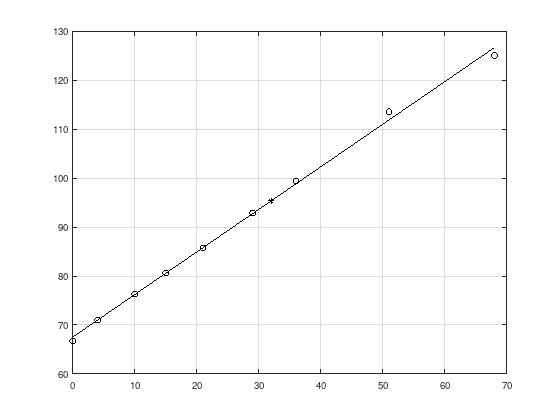

In [2]:
% `Ввод экспериментальных данных`
X=[0 4 10 15 21 29 36 51 68];
Y=[66.7 71.0 76.3 80.6 85.7 92.9 99.4 113.6 125.1];
% `Вычисление вектора коэффициентов полинома y=a1*x+a2`
[a]=polyfit(X,Y,1)
% `Вычисление значения полинома y=a1*x+a2 в точке t=32`
t=32;yt=a(1)*t+a(2)
% `Построение графика полинома y=a1*x+a2, экспериментальных точек`
% `и значения в заданной точке в одной графической области`
x=0:68;y=a(1)*x+a(2);
plot(X,Y,'ok',x,y,'-k',t,yt,'*k')
grid on;
% `Вычисление коэффициента корреляции`
k =corr(x,y)

На графике изображены экспериментальные точки, линия
   регрессии $y=a_1x+a_2$, на котором отмечена точка $t=32$.

<b>Пример:</b>

   В результате эксперимента получена табличная зависимость $y(x)$
   . Подобрать аналитическую
   зависимость $Y=ax^be^{cx}$ методом наименьших квадратов.
   Вычислить ожидаемое значение в точках 2, 3, 4. Вычислить индекс корреляции.
   
   |<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|
   |:-----:|:------:|:-----:|:-----:|:-----:|:-----:|:------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
   | x | 1   | 1,4  | 1,8  | 2,2  | 2,6  | 3    | 3,4 | 3,8  | 4,2  | 4,6  | 5    | 5,4  | 5,8 |
   | y | 0,7 | 0,75 | 0,67 | 0,62 | 0,51 | 0,45 | 0,4 | 0,32 | 0,28 | 0,25 | 0,22 | 0,16 | 0,1 |
   
   Решение задачи подбора параметров функции $f(x)=ax^be^{cx}$ в <b>Octave</b> возможно двумя способами:

   <ol>
      <li>Решение задачи путём поиска минимума функции. После чего надо пересчитать значение коэффициента
            $a$ по формуле $a=e^A$.</li>
      <li>Формирование системы линейных алгебраических уравнений и её решения.
         Следует помнить, что при
         отрицательных значениях $y$ необходимо будет решать проблему замены
         $Y=\ln y$. </li>
   </ol>

   Рассмотрим последовательно оба варианта решения задачи.

   <b>Способ 1.</b>

   Функция $
S(A,b,c)=\sum_{i=1}^n\left(Y1_i-A-b\ln x_i-cx_i\right)^2\to\min
$ реализована в <b>Octave</b> с помощью
   функции $f\_mnk$. Полный текст программы
   решения задачи способом 1 с комментариями приведён ниже. Вместо коэффициентов $A$, $b$, $c$
   из формул в программе на <b>Octave</b> используется массив $c$.


c =

   0.3350
   0.9018
  -0.6934

sum1 = 0.090533
x2 =

   2   3   4

y2 =

   0.6527   0.4703   0.3048

R = 0.9953


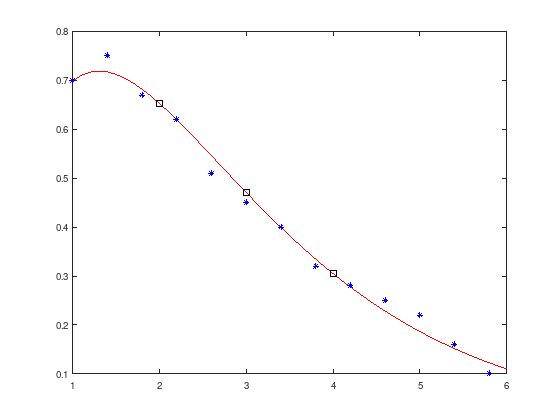

In [6]:
function s=f_mnk(c)
% `Переменные x,y являются глобальными, используются в нескольких функциях`
    global x;
    global y;
    s=0;
    for i=1:length(x)
        s=s+(log(y(i))-c(1)-c(2)*log(x(i)) -c(3)*x(i))^2;
    end
end
%————————————————-

% `Задание начального значения вектора c, при неправильном его`
% `определении, экстремум может быть найден неправильно.`
c=[2;1;3];
% `Определение координат экспериментальных точек`
x=[1 1.4 1.8 2.2 2.6 3 3.4 3.8 4.2 4.6 5 5.4 5.8];
y=[0.7 0.75 0.67 0.62 0.51 0.45 0.4 0.32 0.28 0.25 0.22 0.16 0.1];
% `Решение задачи оптимизации функции 11.15 с помощью sqp.`
c=sqp(c,@f_mnk)
% `Вычисление суммарной квадратичной ошибки для подобранной`
% `зависимости и вывод её на экран.`
sum1=f_mnk(c)
% `Формирование точек для построения графика подобранной кривой.`
x1=1:0.1:6;
y1=exp(c(1)).*x1.^c(2).*exp(c(3).*x1);
% `Вычисление значений на подобранной кривой в заданных точках.`
yr=exp(c(1)).*x.^c(2).*exp(c(3).*x);
% `Вычисление ожидаемого значения подобранной функции в точках x=[2,3,4]`
x2=[2 3 4]
y2=exp(c(1)).*x2.^c(2).*exp(c(3).*x2)
% `Построение графика: подобранная кривая, f(x2) и экспериментальные точки.`
plot(x1,y1,'-r',x,y,'*b',x2,y2,'sk');
% `Вычисление индекса корреляции.`
R=sqrt(1-sum((y-yr).^2)/sum((y-mean(y)).^2))

Таким образом подобрана зависимость $Y=0.33503x^{0.90183}e^{-0.9337x}$.
   Вычислено ожидаемое значение в точках 2, 3, 4:
   $Y(2)=0.65272,Y(3)=0.47033,Y(4)=0.30475$. Индекс корреляции равен 0.99533.

   <b>Способ 2</b>

   Теперь рассмотрим решение задачи путём решения системы.

c =

   0.3350
   0.9018
  -0.6934

sum1 = 0.090533
x2 =

   2   3   4

y2 =

   0.6527   0.4703   0.3048

R = 0.9953


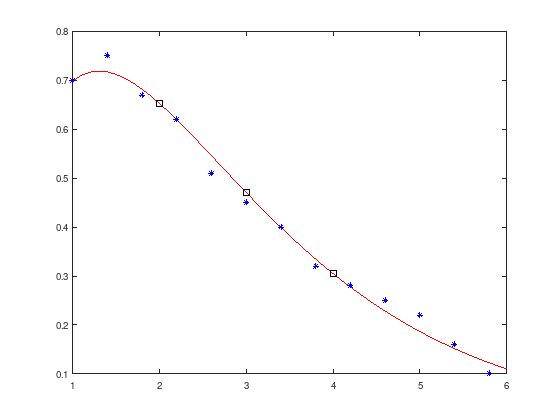

In [8]:
function s=f_mnk(c)
% `Переменные x,y являются глобальными, используются в нескольких функциях`
global x;
global y;
s=0;
for i=1:length(x)
s=s+(log(y(i))-c(1)-c(2)*log(x(i)) -c(3)*x(i))^2;
end
end
%——————————-----
global x;
global y;
% `Определение координат экспериментальных точек`
x=[1 1.4 1.8 2.2 2.6 3 3.4 3.8 4.2 4.6 5 5.4 5.8];
y=[0.7 0.75 0.67 0.62 0.51 0.45 0.4 0.32 0.28 0.25 0.22 0.16 0.1];
% `Формирование СЛАУ (11.16)`
G=[length(x) sum(log(x)) sum(x); sum(log(x)) sum(log(x).*log(x)) sum(x.*log(x)); sum(x) sum(x.*log(x)) sum(x.*x)];
H=[sum(log(y)); sum(log(y).*log(x)); sum(log(y).*x)];
% `Решение СЛАУ методом Гаусса с помощью функции rref.`
C=rref([G H]);n=size(C);c=C(:,n(2))
% `Вычисление суммарной квадратичной ошибки для подобранной`
% `зависимости и вывод её на экран.`
sum1=f_mnk(c)
% `Формирование точек для построения графика подобранной кривой.`
x1=1:0.1:6;
y1=exp(c(1)).*x1.^c(2).*exp(c(3).*x1);
% `Вычисление значений на подобранной кривой в заданных точках.`
yr=exp(c(1)).*x.^c(2).*exp(c(3).*x);
% `Вычисление ожидаемого значения подобранной функции в точках x=[2,3,4]`
x2=[2 3 4]
y2=exp(c(1)).*x2.^c(2).*exp(c(3).*x2)
% `Построение графика: подобранная кривая, f(x2) и экспериментальные точки.`
plot(x1,y1,'-r',x,y,'*b',x2,y2,'sk');
% `Вычисление индекса корреляции.`
R=sqrt(1-sum((y-yr).^2)/sum((y-mean(y)).^2))

<b>Пример:</b>

В результате эксперимента получена табличная зависимость $y(x)$
   . Подобрать аналитические
   зависимости $f(x)=b_1+b_2x+b_3x^2+b_4x^3+b_5x^4+b_6x^5$,
   $g(x)=a_1+a_2x+a_3x^2+a_4x^3+a_5x^5$ и $\varphi(x)=c_1+c_2x+c_4x^3+c_5x^5$
   методом наименьших квадратов. Пользуясь значением индекса корреляции
   выбрать наилучшую из них, с помощью которой вычислить
   ожидаемое значение в точках 1, 2.5, 4.8. Построить графики экспериментальных
   точек, подобранных зависимостей. На графиках отобразить рассчитанные
   значения в точках 1, 2.5, 4.8.
   |<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|
   |:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
   | x |-2 |-1,3 |-0,6 |0,1 |0,8 |1,5 |2,2 |2,9 |3,6 |4,3 |5 |5,7 |6,4 |
   | y |-10 |-5 |0 |0,7 |0,8 |2 |3 |5 |8 |30 |60 |100 |238|
   
   Как рассматривалось ранее, решать задачу подбора параметров полинома
   методом наименьших квадратов в <b>Octave</b> можно тремя
   способами.

   <ol>
      <li>Сформировать и решить систему уравнений.</li>
      <li>Решить задачу оптимизации.
         В случае полинома $f(x)=\displaystyle\sum _{i=1}^{k+1}a_ix^{i-1}$ подбираемые
         коэффициенты $a_i$ будут входить в функцию
         линейным образом и не должно возникнуть проблем при
         решении задачи оптимизации с помощью функции $sqp$.</li>
      <li>Использовать функцию <b>polyfit</b>.</li>
   </ol>

   Чтобы продемонстрировать использование всех трёх методов для подбора
   $f(x)=\sum _{i=1}^6b_ix^{i-1}$ воспользуемся
   функцией <b>polyfit</b>, для формирования коэффициентов функции
   $g(x)$ сформируем и решим систему
   уравнений, а функцию $\varphi(x)$ будем искать
   с помощью функции $sqp$.

   Для формирования подбора коэффициентов функции
   $g(x)=a_1+a_2x+a_3x^2+a_4x^3+a_5x^5$ сформируем систему
   уравнений. Составим функцию $S(a_1,a_2,a_3,a_4,a_5)=
   \sum_{i=1}^n(y_i-a_1-a_2x_i-a_3x_i^2-a_4x_i^3-a_5x_i^5)^2$.
   После дифференцирования $S$ по $a_1$, $a_2$, $a_3$, $a_4$ и $a_5$
   система линейных алгебраических уравнений для вычисления параметров
   $a_1$, $a_2$, $a_3$, $a_4$, $a_5$ примет вид:


   $$\left\{
   \begin{aligned}
   \displaystyle
   a_1n+a_2\sum_{i=1}^nx_i+a_3\sum _{i=1}^nx_i^2+a_4\sum_{i=1}^nx_i^3+a_5\sum_{i=1}^nx_i^5=\sum_{i=1}^ny_i\\
   \displaystyle
   a_1\sum_{i=1}^nx_i+a_2\sum_{i=1}^nx_i^2+a_3\sum_{i=1}^nx_i^3+a_4\sum_{i=1}^nx_i^4+a_5\sum_{i=1}^nx_i^6=\sum_{i=1}^ny_ix_i\\
   \displaystyle
   a_1\sum_{i=1}^nx_i^2+a_2\sum_{i=1}^nx_i^3+a_3\sum_{i=1}^nx_i^4+a_4\sum_{i=1}^nx_i^5+a_5\sum_{i=1}^nx_i^7=\sum_{i=1}^ny_ix_i^2\\
   \displaystyle
   a_1\sum_{i=1}^nx_i^3+a_2\sum_{i=1}^nx_i^4+a_3\sum_{i=1}^nx_i^5+a_4\sum_{i=1}^nx_i^6+a_5\sum_{i=1}^nx_i^8=\sum_{i=1}^ny_ix_i^3\\
   \displaystyle
   a_1\sum_{i=1}^nx_i^5+a_2\sum_{i=1}^nx_i^6+a_3\sum_{i=1}^nx_i^7+a_4\sum_{i=1}^nx_i^8+a_5\sum_{i=1}^nx_i^{10}=\sum_{i=1}^ny_ix_i^5
   \end{aligned}
   \right. $$


   Решив систему , найдём коэффициенты $a_1$, $a_2$, $a_3$, $a_4$ и $a_5$
   функции $g(x)=a_1+a_2x+a_3x^2+a_4x^3+a_5x^5$.

   Для поиска функциональной зависимости вида $\varphi(x)=c_1+c_2x+c_4x^3+c_5x^5$
   необходимо будет найти такие значения $c_1,c_2,c_3,c_4$, при которых функция

   $$
   S(c_1,c_2,c_3,c_4)=\sum_{i=1}^n(y_i-c_1-c_2x_i-c_3x_i^3-c_4x_i^5)^2
   $$

   принимала бы наименьшее значение.

   После вывода необходимых формул приступим к реализации в <b>Octave</b>.
   Текст программы с подробными комментариями приведён ниже:

z =

   1.0000   2.5000   4.8000

B =

   0.083039  -0.567892   0.906779   1.609432  -1.115925  -1.355075

GGL =

   1.3000e+01   2.8600e+01   1.5210e+02   7.2701e+02   1.2793e+05
   2.8600e+01   1.5210e+02   7.2701e+02   3.9868e+03   7.5030e+05
   1.5210e+02   7.2701e+02   3.9868e+03   2.2183e+04   4.4706e+06
   7.2701e+02   3.9868e+03   2.2183e+04   1.2793e+05   2.6938e+07
   2.2183e+04   1.2793e+05   7.5030e+05   4.4706e+06   1.6383e+08

error: operator *: nonconformant arguments (op1 is 5x5, op2 is 1x5)
C =

  -1.030343
   5.080377
  -0.609719
   0.033533

error: 'A' undefined near line 1, column 1
error: 'A' undefined near line 1, column 1
R1 = 0.9969
error: 'yr2' undefined near line 1, column 1
R3 = 0.9957
error: 'R2' undefined near line 1, column 1
error: 'R2' undefined near line 1, column 1
error: 'Y2' undefined near line 1, column 1


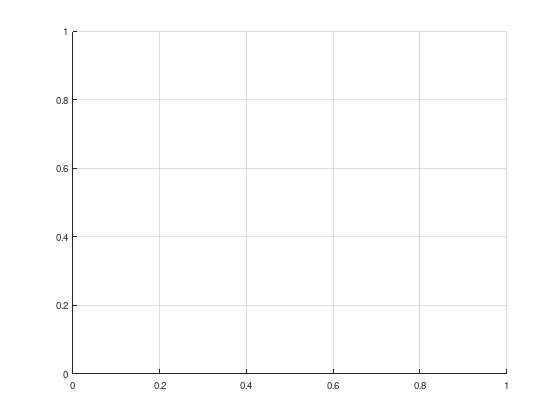

In [9]:

grid on;
% `Функция для подбора зависимости $fi(x)$ методом наименьших квадратов.`
function s=f_mnk(c)
% `Переменные $x$, $y$ являются глобальными, используются в`
% `функции $f\_mnk$ и главной функции.`
global x;global y;
% `Формирование суммы квадратов отклонений .`
s=0;
for i=1:length(x)
s=s+(y(i)-c(1)-c(2)*x(i)-c(3)*x(i)^3-c(4)*x(i)^5)^2;
end
end
% `Главная функция ————————————`
global x;global y;
% `Определение координат экспериментальных точек`
x=[-2 -1.3 -0.6 0.1 0.8 1.5 2.2 2.9 3.6 4.3 5 5.7 6.4];
y=[-10 -5 0 0.7 0.8 2 3 5 8 30 60 100 238];
z=[1 2.5 4.8]
% `Подбор коэффициентов зависимости f(x) (полинома пятой степени)`
% `методом наименьших квадратов, используя функцию polyfit.`
% `Коэффициенты полинома будут хранится в переменной B.`
B=polyfit(x,y,5)
% `Формирование точек для построения графиков подобранных функций.`
X1=-2:0.1:6.5;
% `Вычисление ординат точек графика первой функции f(x).`
Y1=polyval(B,X1);
% `Формирование системы для подбора функции g(x). Здесь GGL —`
% `матрица коэффициентов, H — вектор правых частей системы ,`
% `G — первые 4 строки и 4 столбца матрицы коэффициентов, G1 — пятый `
% `столбец матрицы коэффициентов, G2 — пятая строка матрицы коэфф--тов.`
for i = 1:4
for j=1:4
G(i,j)=sum(x.^(i+j-2));
endfor
endfor
for i = 1:4
G1(i)=sum(x.^(i+5));
H(i)=sum(y.*x.^(i-1));
endfor
for i=1:4
G2(i)=sum(x.^(i+4));
endfor
G2(5)=sum(x.^10);
% `Формирование матрицы коэффициентов системы  из матриц`
% `G, G1 и G2.`
GGL=[G G1'; G2]
H(5)=sum(y.*x.^5);
% `Решение системы  методом обратной матрицы и`
% `формирование коэффициентов А функции g(x).`
A=inv(GGL)*H'
% `Подбор коэффициентов зависимости fi(x) методом наименьших квадратов,`
% `используя функцию $sqp$. Коэффициенты функции будут хранится в перемен-`
% `ной C. Задание начального значения вектора С, при неправильном его опре-`
% `делении, экстремум функции может быть найден неправильно.`
C=[2;1;3;1];
% `Поиск вектора С, при котором функция  достигает своего`
% `минимального значения, вектор С — коэффициенты функции fi.`
C=sqp(C,@f_mnk)
% `Вычисление ординат точек графика второй функции g(x).`
Y2=A(1)+A(2)*X1+A(3)*X1.^2+A(4)*X1.^3+A(5)*X1.^5;
% `Вычисление ординат точек графика третьей функции fi(x).`
Y3=C(1)+C(2)*X1+C(3)*X1.^3 + C(4)*X1.^5;
% `Вычисление значений первой функции f(x) в заданных точках.`
yr1=polyval(B,x);
% `Вычисление значений второй функции g(x) в заданных точках.`
yr2=A(1)+A(2)*x+A(3)*x.^2+A(4)*x.^3+A(5)*x.^5;
% `Вычисление значений третьей функции fi(x) в заданных точках.`
yr3=C(1)+C(2)*x+C(3)*x.^3 + C(4)*x.^5;
% `Вычисление индекса корреляции для первой функции f(x).`
R1=sqrt(1-sum((y-yr1).^2)/sum((y-mean(y)).^2))
% `Вычисление индекса корреляции для второй функции g(x).`
R2=sqrt(1-sum((y-yr2).^2)/sum((y-mean(y)).^2))
% `Вычисление индекса корреляции для третьей функции fi(x).`
R3=sqrt(1-sum((y-yr3).^2)/sum((y-mean(y)).^2))
% `Сравнивая значения трёх индексов корреляции, выбираем наилучшую`
% `функцию и с её помощью вычисляем ожидаемое значение в точках 1, 2.5, 4.8.`
if R1>R2
  if R1>R3
yz=polyval(B,z)
"R1="; R1
endif
endif


if R2>R1
  if  R2>R3
yz=C2(1)+C2(2)*z+C2(3)*z.^2+C2(4)*z.^3+C2(5)*z.^5
"R2="; R2
endif
endif


if R3>R1
  if R3>R2
yz=C(1)+C(2)*z+C(3)*z.^3 + C(4)*z.^5
"R3="; R3
endif
endif
% `Построение графика.`
plot(x,y,"*r;experiment;",X1,Y1,'-b;f(x);',X1,Y2,'dr;g(x);',X1,Y3,'ok;fi(x);',z,yz,'sb;f(z);');

Рассмотренная задача демонстрирует основные приёмы подбора
   зависимости методом наименьших квадратов. Авторы
   рекомендует внимательно рассмотреть её для понимания методов
   решения подобных задач в <b>Octave</b>.

Несколько советов по решению задачи аппроксимации.
   <ol>
      <li>Подбор каждой зависимости по экспериментальным данным —
         довольно сложная математическая задача, поэтому следует
         аккуратно выбирать вид зависимости, наиболее точно описывающей
         экспериментальные точки.</li>
      <li>Необходимо сформировать реальную систему уравнений.
         Следует помнить, что проще и точнее решать систему линейных
         алгебраических уравнений, чем систему нелинейных уравнений.
         Поэтому, может быть, следует преобразовать исходную функцию
         (прологарифмировать, сделать замену и т. д.) и только после
         этого составлять систему уравнений.</li>
      <li>При том, что функция $sqp$ — довольно мощная, лучше
         использовать методы и функции решения систем
         линейных алгебраических уравнений, функцию <b>polyfit</b>, чем
         функцию $sqp$. Этот совет связан с тем, что функция $sqp$ —
         приближённые итерационные алгоритмы, поэтому получаемый результат
         иногда может быть менее точен, чем при точных методах решения
         систем линейных алгебраических уравнений. Но, иногда,
         именно функция $sqp$ — единственный метод решения задачи.</li>
      <li>Для оценки корректности подобранной зависимости следует
         использовать коэффициент корреляции, критерий Стьюдента
         (для линейной зависимости) и индекс корреляции и суммарную
         квадратичную ошибку (для нелинейных зависимостей).</li>
   </ol>